<a href="https://colab.research.google.com/github/AbdoulKidakou/M1SLED/blob/main/Data_Science_US_Flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of the Impact of Weather Conditions on Flight Delays.**

**Objective:** Analyze flight delays based on weather conditions.

**Questions to Address:**


*   What types of weather conditions have the greatest impact on flight delays?
*   Which airports are most affected by weather-related delays?





**Acquire a Dataset and Justify the Sources**

**Dataset:** Using a dataset available on Kaggle (https://www.kaggle.com/datasets/bordanova/2023-us-civil-flights-delay-meteo-and-aircraft?resource=download&select=US_flights_2023.csv)

**Description:** Dataset of delayed flights in the United States.

**Justification:** Reliable data, well-documented, and easily downloadable.

In [1]:
#IMPORTATION DES BILIOTHEQUES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the CSV File into a Pandas DataFrame**

In [7]:
# Charger les données
data = pd.read_csv("US_flights_2023.csv")
#aperçu des données
data.head()

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,Arr_Airport,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Manufacturer,Model,Aicraft_age
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,LGA,"New York, NY",-12.0,Low <5min,56.0,Short Haul >1500Mi,0.0,0.0,0.0,0.0,0.0,CANADAIR REGIONAL JET,CRJ,16.0
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,LGA,"New York, NY",-8.0,Low <5min,62.0,Short Haul >1500Mi,0.0,0.0,0.0,0.0,0.0,CANADAIR REGIONAL JET,CRJ,16.0
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,LGA,"New York, NY",-21.0,Low <5min,49.0,Short Haul >1500Mi,0.0,0.0,0.0,0.0,0.0,CANADAIR REGIONAL JET,CRJ,10.0
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,LGA,"New York, NY",-17.0,Low <5min,54.0,Short Haul >1500Mi,0.0,0.0,0.0,0.0,0.0,CANADAIR REGIONAL JET,CRJ,17.0
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,LGA,"New York, NY",-16.0,Low <5min,50.0,Short Haul >1500Mi,0.0,0.0,0.0,0.0,0.0,CANADAIR REGIONAL JET,CRJ,10.0


In [5]:
#configurer l'affichage des données
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#**Exploratory Data Analysis (EDA)**

**Data Types:**

     

*   **Nominal:** Flight identifiers, airport names.
*   **Ordinal:** Levels of delay severity (minor, moderate, severe).


*   **Continuous Quantitative:** Delay duration in minutes.
*   **Discrete:** Number of flights per airport.

**NB:**In this dataset, we do not have any missing data.




    
    
    

In [8]:
# Résumé des données
#aperçu de la structure des données
print(data.info())

#Statistiques descriptives
print(data.describe())

#vérification des valeurs manquantes
print(data.notnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36253 entries, 0 to 36252
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FlightDate          36253 non-null  object 
 1   Day_Of_Week         36253 non-null  int64  
 2   Airline             36253 non-null  object 
 3   Tail_Number         36253 non-null  object 
 4   Dep_Airport         36253 non-null  object 
 5   Dep_CityName        36253 non-null  object 
 6   DepTime_label       36253 non-null  object 
 7   Dep_Delay           36253 non-null  int64  
 8   Dep_Delay_Tag       36253 non-null  int64  
 9   Dep_Delay_Type      36253 non-null  object 
 10  Arr_Airport         36252 non-null  object 
 11  Arr_CityName        36252 non-null  object 
 12  Arr_Delay           36252 non-null  float64
 13  Arr_Delay_Type      36252 non-null  object 
 14  Flight_Duration     36252 non-null  float64
 15  Distance_type       36252 non-null  object 
 16  Dela

# **Data Visualization**


**1. Distribution of Flight Delays**




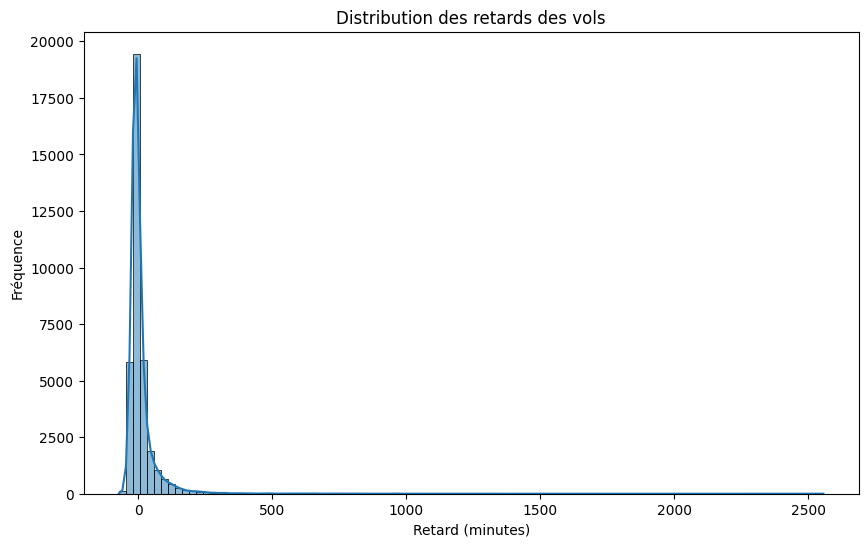

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data['Arr_Delay'], kde=True, bins= 100)
plt.title('Distribution des retards des vols')
plt.xlabel('Retard (minutes)')
plt.ylabel('Fréquence')
plt.show()

**Frequency of Low Delays:** The majority of flights have very low delays, represented by the **highest bars** on the left side of the graph.

**Frequency of hight Delay:** there are some flights with very significant delays, but these are rare.


**2. Missing Values**




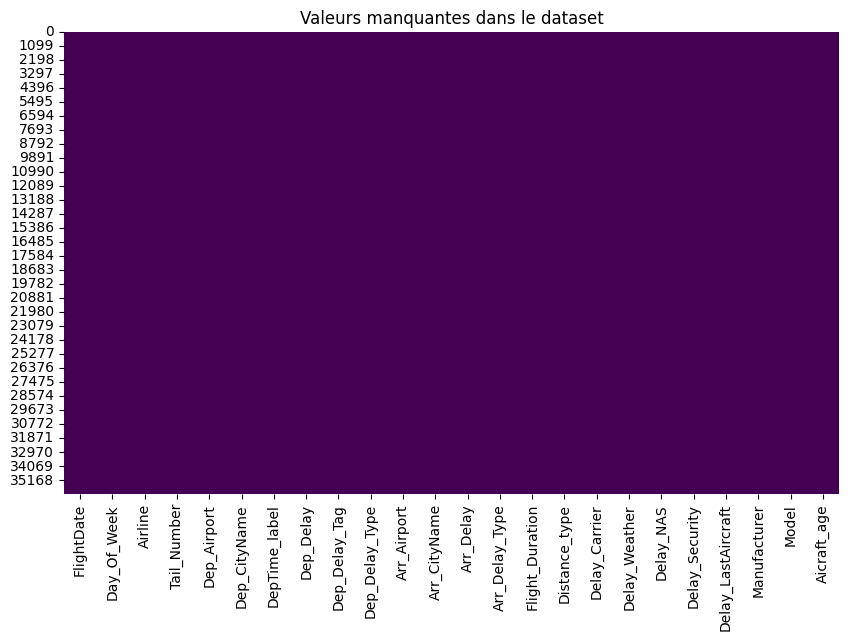

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Valeurs manquantes dans le dataset')
plt.show()


**3. Boxplot for Delays**





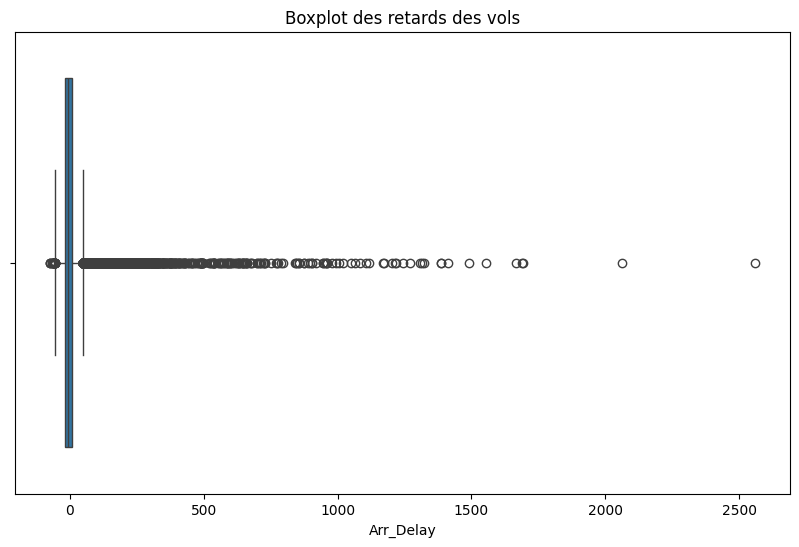

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Arr_Delay'])
plt.title('Boxplot des retards des vols')
plt.show()

The majority of delays are concentrated near zero, suggesting that most flights arrive with minimal delay. However, there are a few extreme cases of significantly longer delays, as indicated by the outliers.